<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# IRIS Flower PROJECT

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Label encoding](#section4)<br>
    - 4.1 [Spliting irisDataset into training set and test set](#section401)<br>
    - 4.2 [Data Visualization](#section402)<br>  
    - 4.3 [Splitting X and y into training and test datasets.](#section403)<br>
    - 4.4 [Creating Petals And Sepals Training Data ](#section404)<br>
    - 4.5 [Different Models Accuracy](#section405)<br>
    - 4.6 [Using KNN for regression](#section406)<br>
5. [Model evaluationpredictions](#section5)<br>
    - 5.1 [Using cross-validation for parameter tuning](#section501)<br>
6. [Conclusion](#section6)<br>
    - 6.1 [Actionable Insights](#section601)

<a id=section1></a>

## 1. Problem Statement

   The distinguishing the species of __iris flowers__ is difficult measurements associated with some irises that have been previously identified by an expert botanist. To find which species each iris are belongs to species setose, versicolor or virginica. The parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which are contains Sepal width, Sepal length, Petal width and Petal length
   
- The length and the width of the sepals and petals in centimeters.

<a id=section2></a>
## 2. Data Loading and Description

The iris dataset contains the following data.

- Sepal_length: Sepal length, in centimeters, used as input.
- Sepal_width: Sepal width, in centimeters, used as input.
- Petal_length: Petal length, in centimeters, used as input.
- Petal_width: Petal width, in centimeters, used as input.
- Species: Iris Setosa, Versicolor, or Virginica.


__Importing Packages__

In [2]:
import numpy as np                     
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## import pandas_profiling

from sklearn import metrics

import numpy as np
                              
%matplotlib inline                                   # allow plots to appear directly in the notebook

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.




Bad key "text.kerning_factor" on line 4 in
C:\Users\BijayaSanjib\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
UsageError: unrecognized arguments: # allow plots to appear directly in the notebook


#### Importing the Dataset

In [3]:
# Importing the dataset (IRIS Flower).

Project2= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Iris.csv')
Project = Project2.copy()
Project.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


What are the **features**?
- Sepal_length: Sepal length
- Sepal_width: Sepal width
- Petal_length: Petal length
- Petal_width: Petal width
- Species: Iris Setosa, Versicolor, or Virginica


<a id=section3></a>

## 3. Exploratory Data Analysis

In [4]:
# Print all cell's output and not just the last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
Project.shape

(150, 6)

In [6]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- ```info``` function gives us the following insights into the dataframe:

  - There are a total of **150 samples (rows)** and **6 columns** in the dataframe.
  
  - There are **1 columns** with **numeric** datatype.
  - There are **1 columns** with **Object** datatype.
  - There are **4 columns** with **float** datatype.

In [7]:
Project.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN



- ```Describe``` function gives us the following insights into the data:
   - There are 150 **observations** in the dataset.
  
   - As we can see here, mean value is leaser than the median value of each column.
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are **no outliers** present in any columns.
  
   

In [8]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.3


Project.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

(-0.05, 1.05, -0.05, 1.05)

([<matplotlib.patches.Wedge at 0x1dd8bf42a48>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Versicolor'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Setosa'),
  Text(0.5500001486524352, -0.9526278583383436, 'Virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

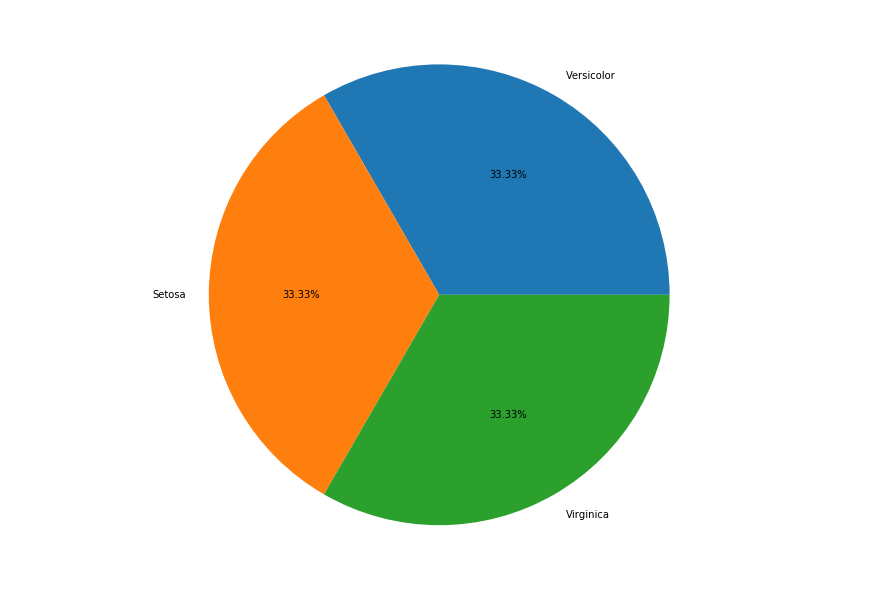

In [9]:
## Pie chart


fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

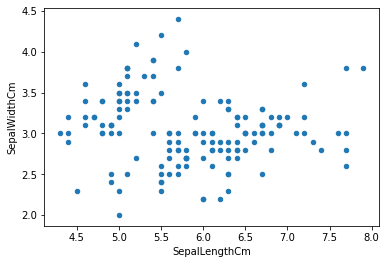

In [10]:
# use this to make a scatterplot of the Iris features.

Project.plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm') 

C:\Users\BijayaSanjib\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


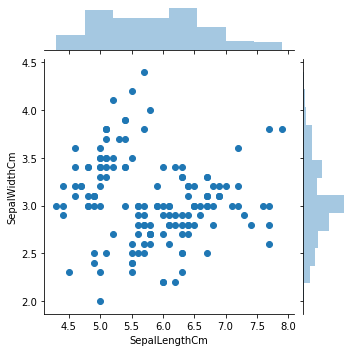

In [11]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x='SepalLengthCm',y='SepalWidthCm', data=Project, size=5)

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

Text(0.5, 1.0, 'Sepal Length Vs Width')

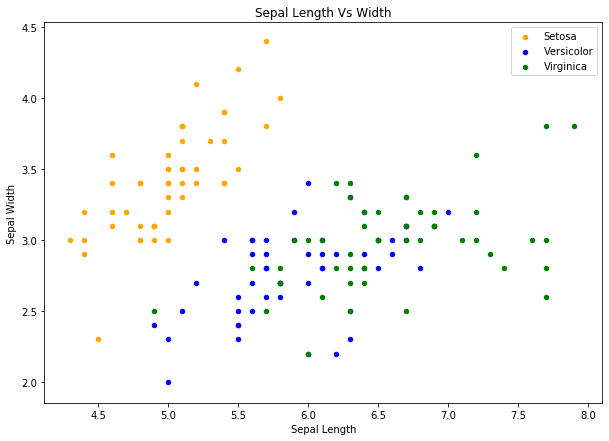

In [12]:
fig = Project[Project.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
Project[Project.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
Project[Project.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD8C4A9F88>,
      dtype=object)

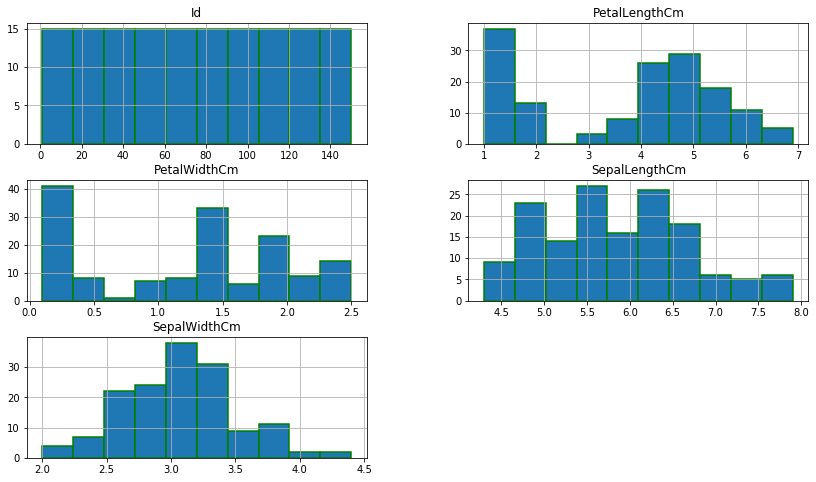

In [13]:
## Histogram

Project.hist(edgecolor='green', linewidth=1.5)
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.show()

<Figure size 1080x720 with 0 Axes>

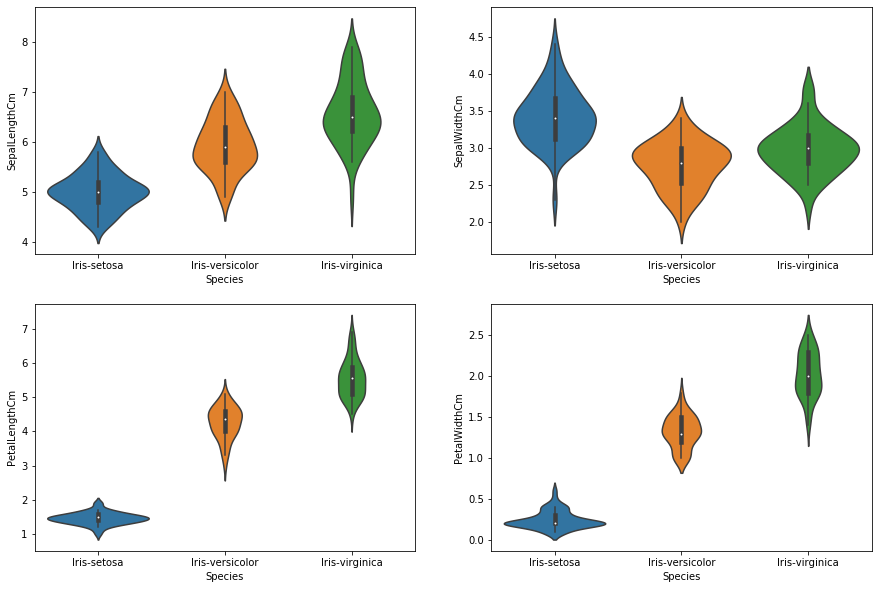

In [14]:
## ViolinPlot

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=Project)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=Project)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=Project)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=Project)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD8CA054C8>,
      dtype=object)

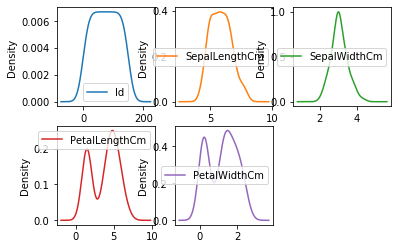

In [15]:
## Density Plot

Project.plot(kind ='density',subplots = True, layout =(2,3),sharex = False)
plt.show()

<Figure size 1008x432 with 0 Axes>

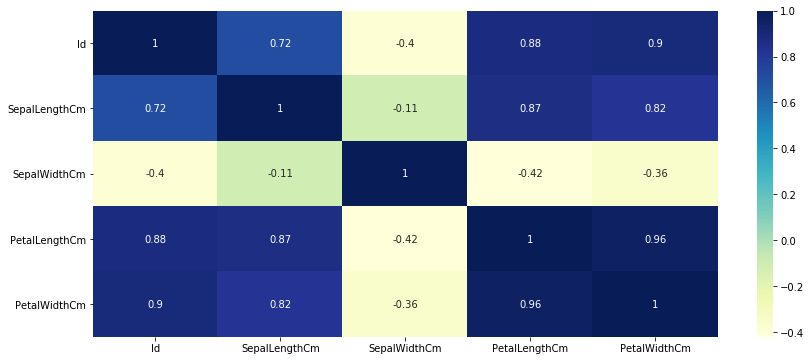

In [16]:
## Correlation heatmap

plt.figure(figsize=(14,6))
sns.heatmap(Project.corr(), annot=True, cmap='YlGnBu')  
plt.show()

Dividing data into features and labels

In [17]:
# pd.get_dummies(Project['Species'],drop_first=True) 

pd.get_dummies(Project['Species'])  

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [18]:

df = pd.concat([Project,pd.get_dummies(Project['Species'])],axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [19]:
df.drop('Species',axis=1,inplace=True)
#df = df.drop('Species',axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [20]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [21]:
feature_columns = ['SepalWidthCm', 'PetalLengthCm','PetalWidthCm',"Iris-setosa","Iris-versicolor","Iris-virginica"]  # X
X = df[feature_columns].values
y = df['SepalLengthCm'].values

# Alternative way of selecting features and labels arrays:
# X = iris.iloc[:, 1:5].values
# y = iris.iloc[:, 5].values

In [22]:
X

array([[3.5, 1.4, 0.2, 1. , 0. , 0. ],
       [3. , 1.4, 0.2, 1. , 0. , 0. ],
       [3.2, 1.3, 0.2, 1. , 0. , 0. ],
       [3.1, 1.5, 0.2, 1. , 0. , 0. ],
       [3.6, 1.4, 0.2, 1. , 0. , 0. ],
       [3.9, 1.7, 0.4, 1. , 0. , 0. ],
       [3.4, 1.4, 0.3, 1. , 0. , 0. ],
       [3.4, 1.5, 0.2, 1. , 0. , 0. ],
       [2.9, 1.4, 0.2, 1. , 0. , 0. ],
       [3.1, 1.5, 0.1, 1. , 0. , 0. ],
       [3.7, 1.5, 0.2, 1. , 0. , 0. ],
       [3.4, 1.6, 0.2, 1. , 0. , 0. ],
       [3. , 1.4, 0.1, 1. , 0. , 0. ],
       [3. , 1.1, 0.1, 1. , 0. , 0. ],
       [4. , 1.2, 0.2, 1. , 0. , 0. ],
       [4.4, 1.5, 0.4, 1. , 0. , 0. ],
       [3.9, 1.3, 0.4, 1. , 0. , 0. ],
       [3.5, 1.4, 0.3, 1. , 0. , 0. ],
       [3.8, 1.7, 0.3, 1. , 0. , 0. ],
       [3.8, 1.5, 0.3, 1. , 0. , 0. ],
       [3.4, 1.7, 0.2, 1. , 0. , 0. ],
       [3.7, 1.5, 0.4, 1. , 0. , 0. ],
       [3.6, 1. , 0.2, 1. , 0. , 0. ],
       [3.3, 1.7, 0.5, 1. , 0. , 0. ],
       [3.4, 1.9, 0.2, 1. , 0. , 0. ],
       [3. , 1.6, 0.2, 1.

<a id=section4></a>
# 4. Label encoding

Need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

<a id=section401></a>
# 4.1 Spliting irisdataset into training set and test set


Let's split irisdataset into training set and test set.

In [24]:
# Do Scaling before

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Lastly, because features values are in the same order of magnitude, there is no need for feature scaling. Nevertheless in other circumstances it is extremly important to apply feature scaling before running classification algorythms.

<a id=section402></a>
# 4.2 Data Visualization

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your iris.

<Figure size 432x288 with 0 Axes>

C:\Users\BijayaSanjib\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

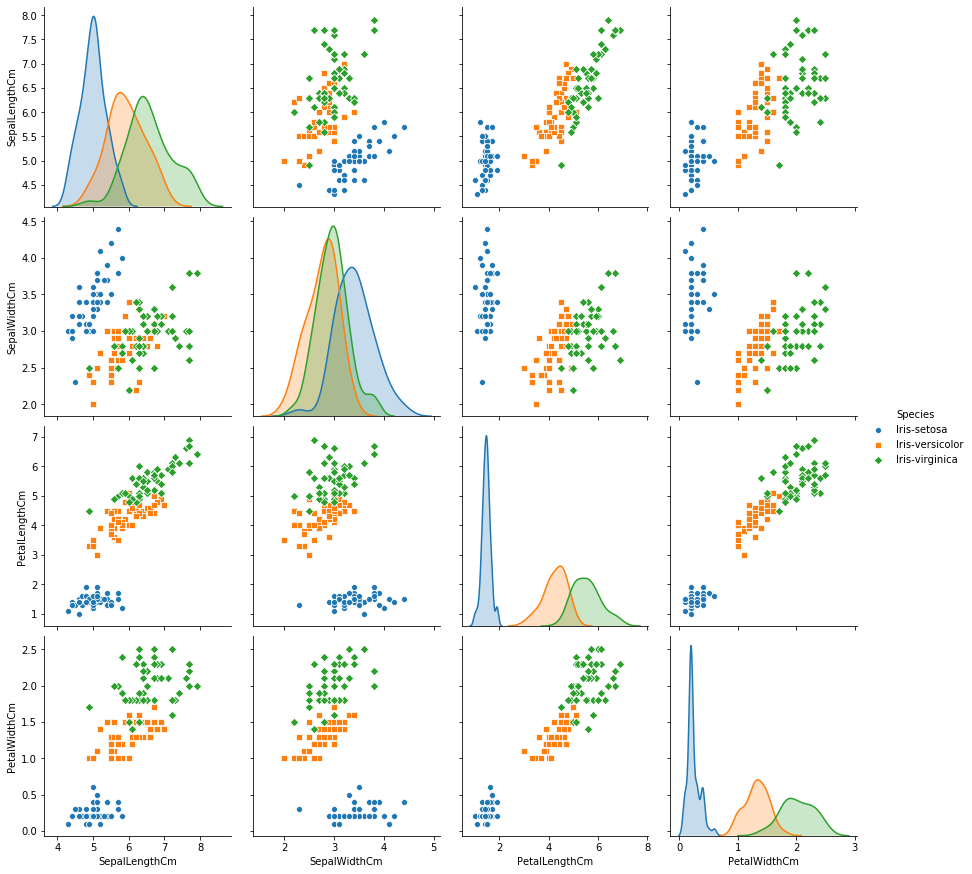

In [25]:
plt.figure()
sns.pairplot(Project.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

# 3D visualization

You can also try to visualize high-dimensional iriss in 3D using color, shape, size and other properties of 3D and 2D objects. In this plot I used marks sizes to visualize fourth dimenssion which is Petal Width [cm].

Text(3.0, 1.1, 'Virginica')

Text(3.0333333333333337, 1.3333333333333333, 'Setosa')

Text(2.3, 1.3, 'Versicolour')

Text(0.5, 0.92, '3D visualization')

Text(0.5, 0, 'Sepal Length [cm]')

[]

Text(0.5, 0, 'Sepal Width [cm]')

[]

Text(0.5, 0, 'Petal Length [cm]')

[]

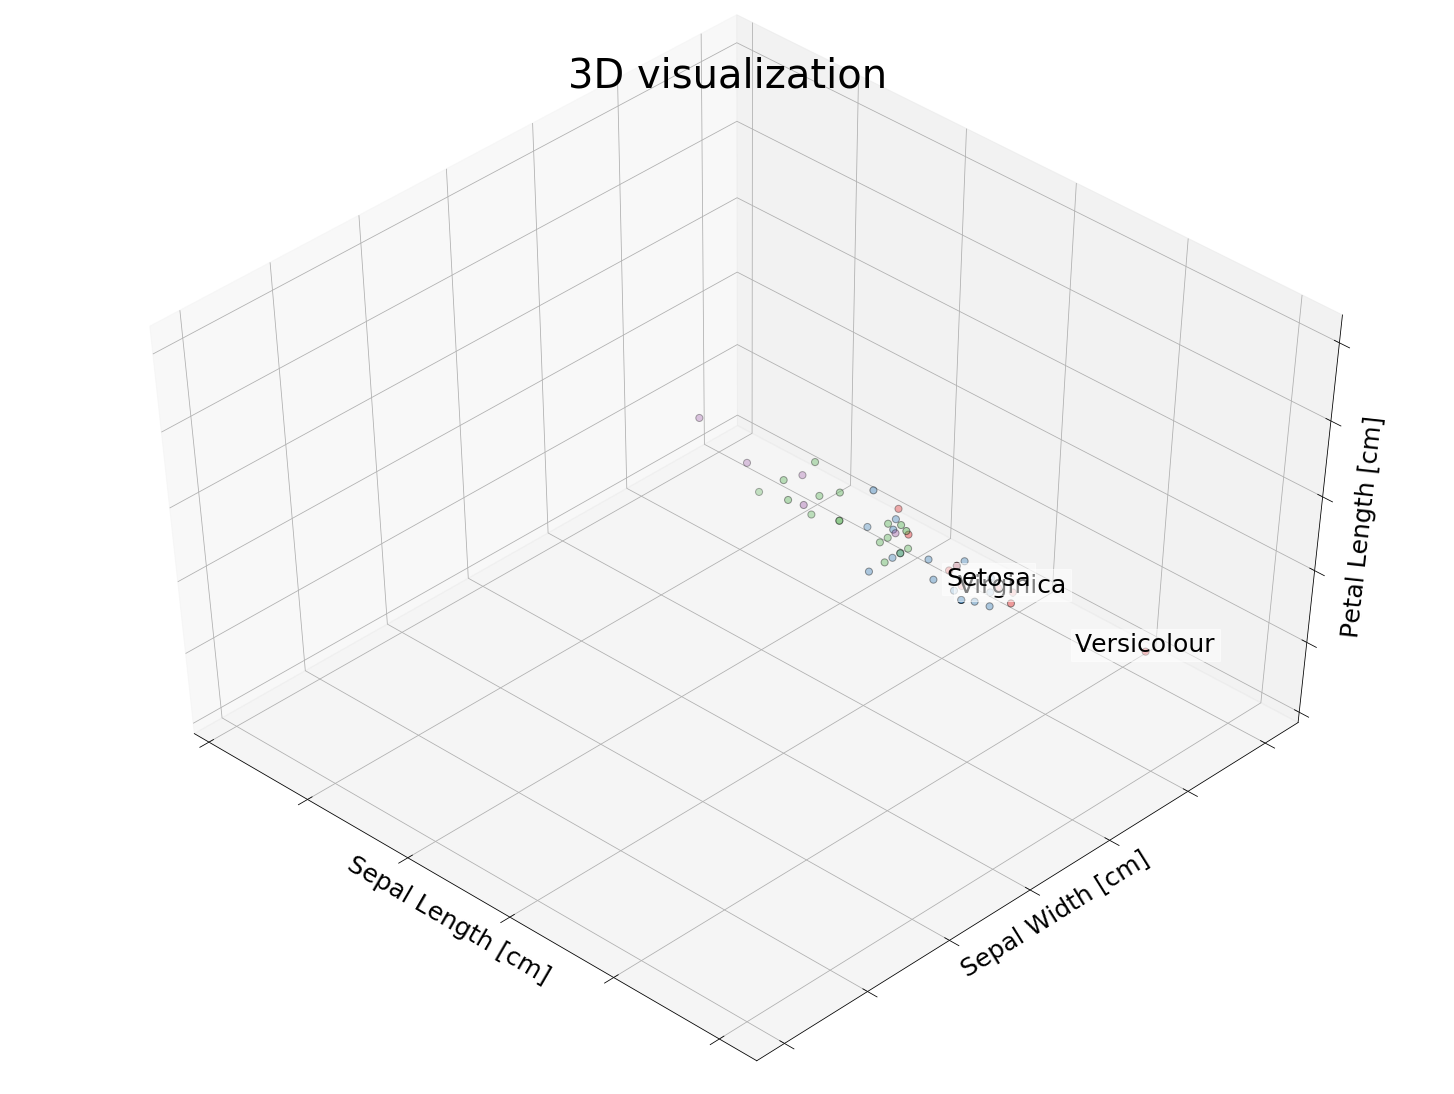

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

The visualize high-dimensional iriss in 3D using color, shape, size and other properties of 3D and 2D objects. In this plot I used marks sizes to visualize fourth dimenssion which is Petal Width [cm].

In [89]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

<a id=section403></a>
### 4.3 Splitting X and y into training and test datasets.

In [63]:
# our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

train, test = train_test_split(Project, test_size=0.3)
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [65]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

train_X.head()
train_y.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
2,4.7,3.2,1.3,0.2
38,4.4,3.0,1.3,0.2
39,5.1,3.4,1.5,0.2
105,7.6,3.0,6.6,2.1
102,7.1,3.0,5.9,2.1


2         Iris-setosa
38        Iris-setosa
39        Iris-setosa
105    Iris-virginica
102    Iris-virginica
Name: Species, dtype: object

### Support Vector Machine - SVM

In [66]:
# select the svm algorithm

model = svm.SVC() 

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome

prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The accuracy of the SVM is:  0.9777777777777777


### Logistic Regression - LR

In [67]:
# select the LR algorithm

model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy of Logistic Regression is:  0.9777777777777777


### Decision Tree - DT

In [68]:
# select the DT algorithm

model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The accuracy of Decision Tree is:  0.9777777777777777


### K-Nearest Neighbors - KNN

In [69]:
# select the KNN algorithm

model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

The accuracy of KNN is:  0.9777777777777777


Let's check the accuracy for various values of n for K-Nearest nerighbours

C:\Users\BijayaSanjib\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

([<matplotlib.axis.XTick at 0x1dd8f660548>,
 <a list of 11 Text xticklabel objects>)

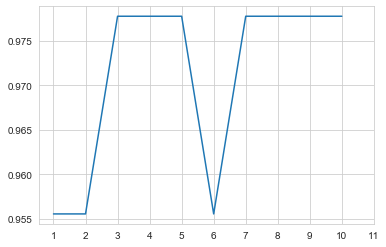

In [72]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10, 11]
plt.xticks(x)

<a id=section404></a>
### 4.4 Creating Petals And Sepals Training Data.

In [73]:
petal = Project[['PetalLengthCm','PetalWidthCm','Species']]
sepal = Project[['SepalLengthCm','SepalWidthCm','Species']]

For Iris Petal

In [74]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

For Iris Sepal

In [75]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

### Support Vector Machine - SVM

In [76]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 

print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The accuracy of the SVM using Petals is: 0.9777777777777777


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The accuracy of the SVM using Sepals is: 0.8


### Logistic Regression - LR

In [77]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Tree - DT

In [78]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The accuracy of the Decision Tree using Petals is: 0.9555555555555556


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


### K-Nearest Neighbors - KNN

In [79]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

The accuracy of the KNN using Petals is: 0.9777777777777777


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

The accuracy of the KNN using Sepals is: 0.7333333333333333


In [80]:
#Correlation in dataframe format 

corr_mat = Project.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


<a id=section405></a>
### 4.5 Different Models Accuracy.

In [81]:
#Using LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.9777777777777777


In [82]:
#Confusion matrix

from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[18  0  0]
 [ 0 15  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [83]:
#Using Support Vector

from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Acc= 0.9777777777777777


In [84]:
#Using KNN Neighbors

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy Score: 0.9777777777777777


In [85]:
#Using GaussianNB

from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy Score: 0.9777777777777777


In [86]:
#Using Decision Tree

from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

Accuracy Score: 0.9777777777777777


In [87]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.977,0.977,0.977,0.977,0.977]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.977,Logistic Regression
0.977,Support Vector Machines
0.977,Naive Bayes
0.977,KNN
0.977,Decision Tree


As the dataset is the normal in nature for that all model accuracy_score are 0.977. As the dataset is unsupervised and used K-Nearest Neighbors – KNN algorithm used for analysis on this dataset.

<a id=section406></a>
# 4.6 Using KNN for regression

Making predictions using K-Nearest Neighbors – KNN algorithm 

In [27]:
# Fitting clasifier to the Training set
# Loading libraries

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fitting the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

<a id=section5></a>
# 5. Model evaluating predictions

In [29]:
from sklearn.metrics import mean_squared_error
cm = np.sqrt(mean_squared_error(y_test, y_pred))
cm

3.77418129459151

One an average any prediction will  deviate from mean values of prediction with +- 0.37 --> Standard Deviation 

<a id=section501></a>
# 5.1 Using cross-validation for parameter tuning

In [30]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'The optimal number of neighbors')

Text(0.5, 0, 'Number of Neighbors K')

Text(0, 0.5, 'Misclassification Error')

<Figure size 432x288 with 0 Axes>

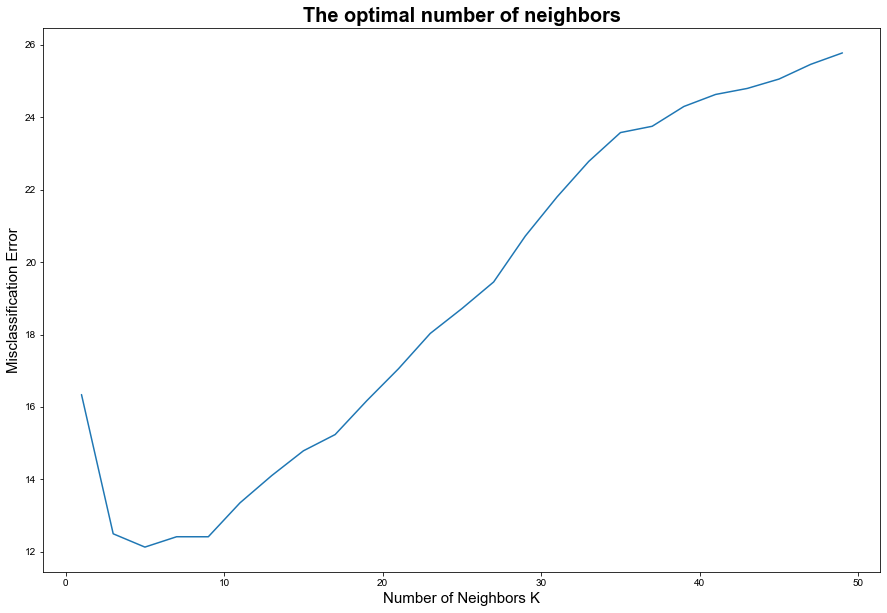

In [31]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [32]:
# finding best k

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 5.


<a id=section6></a>

<a id=section6></a>
## 6. Conclusion

- The analysis helps us to understand what are the features are need to consider for input parameters.
- The main features are 'Sepal_Length', 'Sepal_Width', 'Petal_Length' and 'Petal_WidthGrLivArea’.
- We can see that using petal width and petal length as input parameter, we can predict the flower family.
- The Petal Width and Length are highly correlated.
- The Sepal Width and Length are not correlated.

<a id=section601></a>
### 6.1 Actionable Insights

- Based on analysis if we know the Length and Width then it is easy to get the flower family 
